# Linear Regression using Pyspark

In [1]:
# creating spark environment
import pyspark
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

In [2]:
sc=SparkContext()

In [3]:
spark=SparkSession.builder.master("Local[1]").appName("botson").getOrCreate()

In [4]:
df_boston=spark.read.format("csv").option("header",True).option("InferSchema",True).load("C:/Users/tejas/Downloads/boston_test1.csv")

In [5]:
df_boston.show()

+---+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|_c0|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio| black|lstat|medv|
+---+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|  1|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|  2|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|  3|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|  4|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|  5|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|  6|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|  7|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|  8|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|  9|0.21124|12.5| 7.

In [6]:
import pandas as pd
df_pd=df_boston.toPandas()

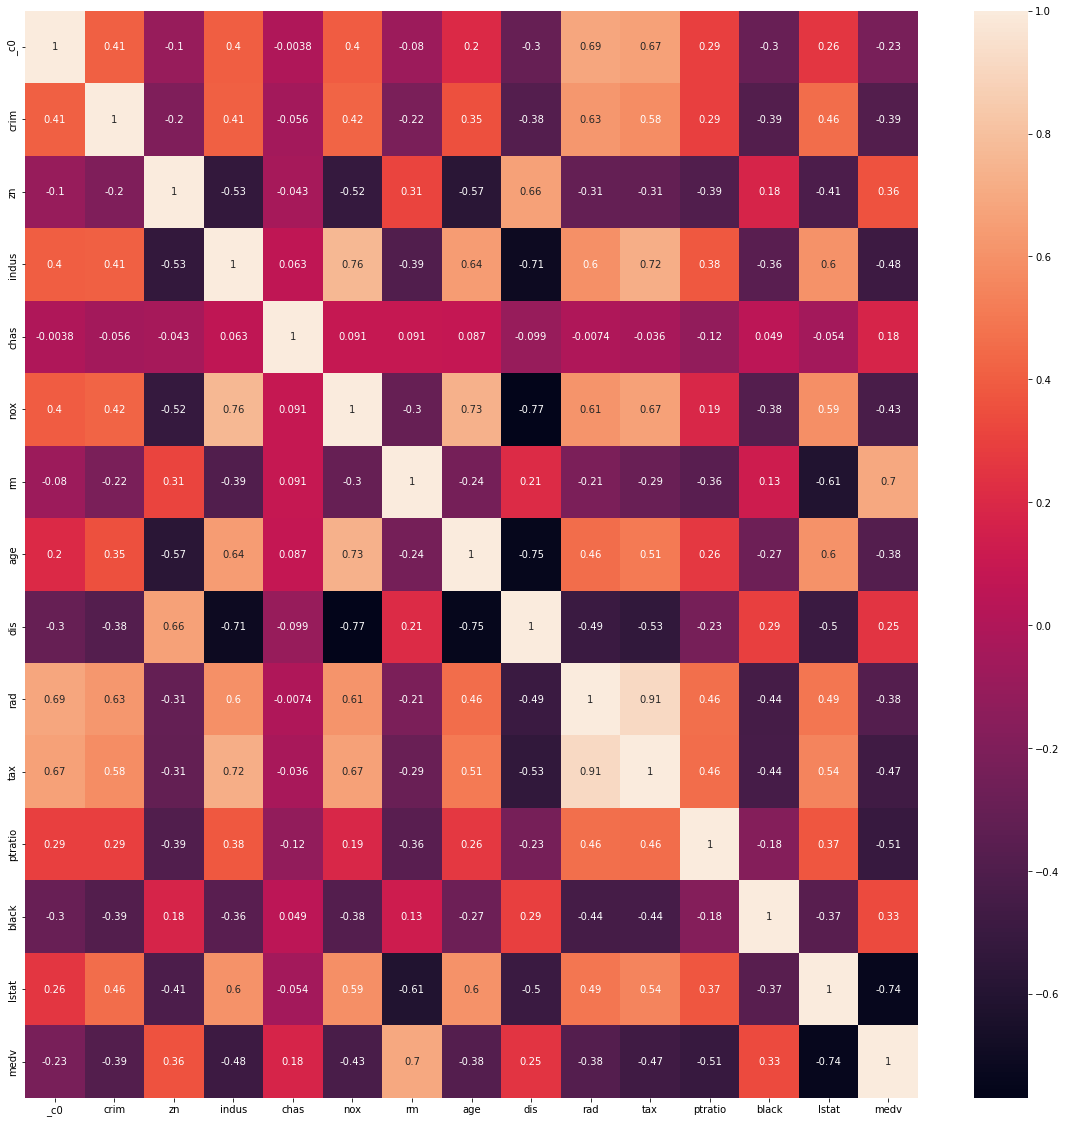

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(20,20))
sns.heatmap(df_pd.corr(),annot=True)
plt.show()

In [8]:
df_pd.corr()["medv"]

_c0       -0.226604
crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
black      0.333461
lstat     -0.737663
medv       1.000000
Name: medv, dtype: float64

In [9]:
x=df_pd.drop("medv",axis=1)

In [10]:
x=x.drop("_c0",axis=1)

In [11]:
str_cols="+".join(x.columns)

In [12]:
from statsmodels.formula.api import ols

In [13]:
str_cols

'crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat'

In [14]:
ols_model=ols("medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat",data=df_pd)

In [15]:
ols_model=ols_model.fit()

In [16]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 08 Jun 2023   Prob (F-statistic):          6.72e-135
Time:                        15:51:17   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
df_boston.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- black: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [18]:
x_df=spark.createDataFrame(x)

In [19]:
x_df.columns

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat']

In [20]:
#creating a feature vector
va=VectorAssembler(inputCols=x_df.columns,outputCol="Features")

In [21]:
df_clean=va.transform(df_boston)

In [22]:
df_clean.show()

+---+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+--------------------+
|_c0|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio| black|lstat|medv|            Features|
+---+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+--------------------+
|  1|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|[0.00632,18.0,2.3...|
|  2|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|[0.02731,0.0,7.07...|
|  3|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|[0.02729,0.0,7.07...|
|  4|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|[0.03237,0.0,2.18...|
|  5|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|[0.06905,0.0,2.18...|
|  6|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|[0.02985,0.0,2.18...|
|  7|0.088

In [23]:
df_clean.select("features").show()

+--------------------+
|            features|
+--------------------+
|[0.00632,18.0,2.3...|
|[0.02731,0.0,7.07...|
|[0.02729,0.0,7.07...|
|[0.03237,0.0,2.18...|
|[0.06905,0.0,2.18...|
|[0.02985,0.0,2.18...|
|[0.08829,12.5,7.8...|
|[0.14455,12.5,7.8...|
|[0.21124,12.5,7.8...|
|[0.17004,12.5,7.8...|
|[0.22489,12.5,7.8...|
|[0.11747,12.5,7.8...|
|[0.09378,12.5,7.8...|
|[0.62976,0.0,8.14...|
|[0.63796,0.0,8.14...|
|[0.62739,0.0,8.14...|
|[1.05393,0.0,8.14...|
|[0.7842,0.0,8.14,...|
|[0.80271,0.0,8.14...|
|[0.7258,0.0,8.14,...|
+--------------------+
only showing top 20 rows



In [24]:
df_clean=df_clean.select("features","medv")

C:\Users\tejas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='medv'>

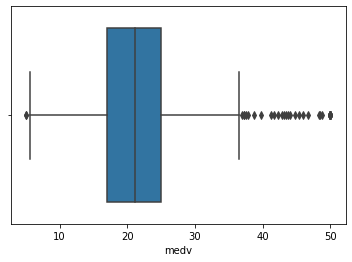

In [25]:
sns.boxplot(df_pd["medv"])

In [26]:
#data is not normaly distributed

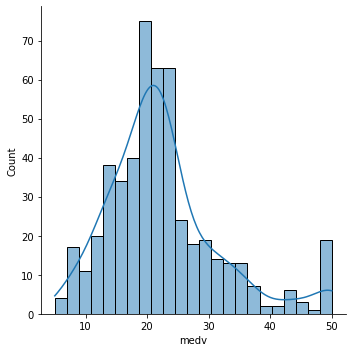

In [27]:
sns.displot(df_pd["medv"],kde=True)

In [28]:
df_clean.show()

+--------------------+----+
|            features|medv|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
|[0.03237,0.0,2.18...|33.4|
|[0.06905,0.0,2.18...|36.2|
|[0.02985,0.0,2.18...|28.7|
|[0.08829,12.5,7.8...|22.9|
|[0.14455,12.5,7.8...|27.1|
|[0.21124,12.5,7.8...|16.5|
|[0.17004,12.5,7.8...|18.9|
|[0.22489,12.5,7.8...|15.0|
|[0.11747,12.5,7.8...|18.9|
|[0.09378,12.5,7.8...|21.7|
|[0.62976,0.0,8.14...|20.4|
|[0.63796,0.0,8.14...|18.2|
|[0.62739,0.0,8.14...|19.9|
|[1.05393,0.0,8.14...|23.1|
|[0.7842,0.0,8.14,...|17.5|
|[0.80271,0.0,8.14...|20.2|
|[0.7258,0.0,8.14,...|18.2|
+--------------------+----+
only showing top 20 rows



In [29]:
### log transforming
import numpy as np
df_clean_pd= df_clean.toPandas()
df_clean_pd["medv"]=np.log(df_clean_pd["medv"])
df_clean = spark.createDataFrame(df_clean_pd)

In [30]:
#split the dataset
train,test=df_clean.randomSplit([.70,.30],seed=100)

In [31]:
#linear regression model
linmod=LinearRegression(featuresCol="features",labelCol="medv")

In [32]:
linmod=linmod.fit(train)

In [33]:
pred_train=linmod.transform(train)

In [34]:
pred_test=linmod.transform(test)

In [35]:
pred_train.show()

+--------------------+------------------+------------------+
|            features|              medv|        prediction|
+--------------------+------------------+------------------+
|[0.00632,18.0,2.3...|3.1780538303479458|3.3636093302322116|
|[0.01311,90.0,1.2...|3.5667118201397288|3.4059526143824463|
|[0.0136,75.0,4.0,...|2.9391619220655967|2.7320458325996446|
|[0.02055,85.0,0.7...|3.2068032436339315| 3.188282253167837|
|[0.02729,0.0,7.07...|3.5467396869528134|  3.41846879126564|
|[0.02731,0.0,7.07...|3.0726933146901194|3.2101864722918396|
|[0.02763,75.0,2.9...| 3.427514689979529| 3.408528896745447|
|[0.02985,0.0,2.18...|3.3568971227655755| 3.242572229527224|
|[0.03237,0.0,2.18...|3.5085558999826545|3.3549639260605995|
|[0.04981,21.0,5.6...| 3.152736022363656|3.1879057431362847|
|[0.0536,21.0,5.64...|3.2188758248682006|  3.32694424974083|
|[0.08014,0.0,5.96...| 3.044522437723423| 3.120056300448266|
|[0.08829,12.5,7.8...| 3.131136910560194|  3.11177830948999|
|[0.08873,21.0,5.6...|2.

In [36]:
pred_test = pred_test.withColumnRenamed("medv","label")

In [37]:
#evaluation
evaluator=RegressionEvaluator()

In [38]:
evaluator.evaluate(pred_test,{evaluator.metricName:"r2"})

0.7896976986740517